In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import squarify

from bokeh.models import ColumnDataSource, LinearColorMapper
from bokeh.palettes import viridis
from bokeh.transform import transform

## Swarm plots

In [132]:
def plot_swarm(df, yr1=2022, yr2=2005, yr3=None):
    if yr2 and yr3:
        colors = { yr1: "#ADD8E6", yr2: "#FF00FF", yr3:"#FF9200"}
        sns.swarmplot(data=df[df["Year"].isin([yr1, yr2, yr3])], 
                  x="region", y="Life Ladder", hue="Year", palette=colors)
    elif yr2:
        colors = { yr1: "#ADD8E6", yr2: "#FF00FF", yr3:"#FF9200"}
        sns.swarmplot(data=df[df["Year"].isin([yr1, yr2])], 
                      x="region", y="Life Ladder", hue="Year", palette=colors)

    plt.xlabel("")
    plt.ylabel("Life Ladder Score")

In [133]:
swarm_df = pd.read_csv("./data/processed/WHR_LL_Region_20052022.csv", index_col=0)
swarm_df.head()

,Year,region,region2,alpha2,Country Code,shortname,Population,Log GDP per capita,Life Ladder
96,2005,Oceania,Australia and New Zealand,AU,AUS,Australia,20176844.0,10.662058,7.340688
97,2007,Oceania,Australia and New Zealand,AU,AUS,Australia,20827622.0,10.694434,7.285391
98,2008,Oceania,Australia and New Zealand,AU,AUS,Australia,21249199.0,10.709456,7.253757
99,2010,Oceania,Australia and New Zealand,AU,AUS,Australia,22031750.0,10.713649,7.450047
100,2011,Oceania,Australia and New Zealand,AU,AUS,Australia,22340024.0,10.723386,7.405616


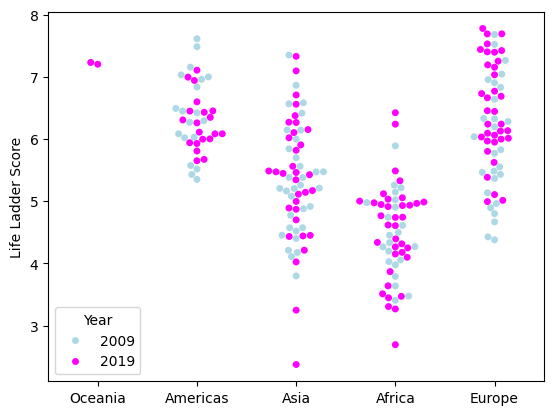

In [134]:
plot_swarm(swarm_df, 2009, 2019)

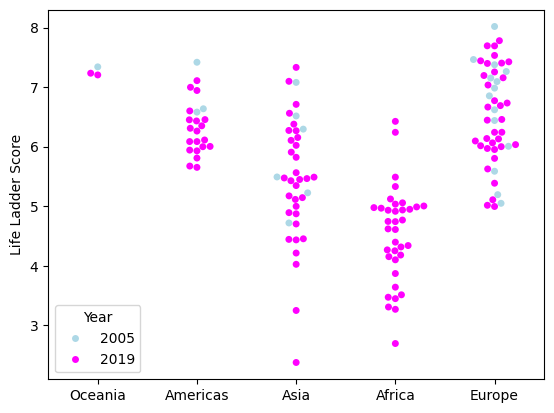

In [91]:
plot_swarm(swarm_df, 2005, 2019)

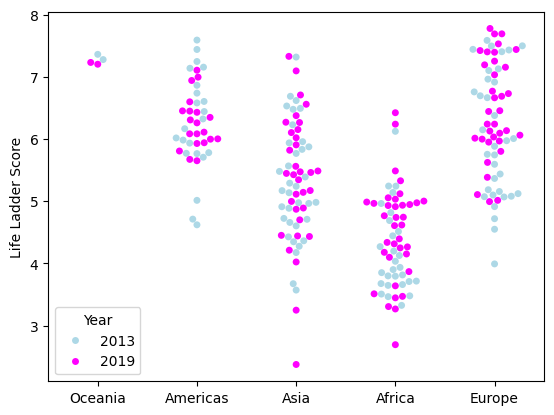

In [92]:
plot_swarm(swarm_df, 2013, 2019)

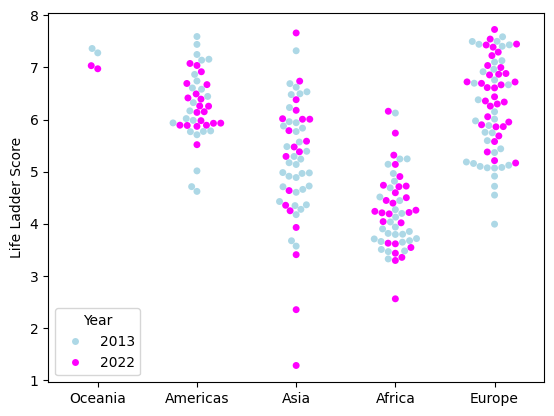

In [93]:
plot_swarm(swarm_df, 2013, 2022)

## Global Line Chart

In [2]:
whr_ay_transposed_df = pd.read_csv("./data/processed/WHR_LifeLadder_T_20052022.csv", index_col="Year")
whr_ay_transposed_df.head()

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2005,NaN,NaN,NaN,NaN,NaN,NaN,7.340688,NaN,NaN,NaN,...,NaN,6.983557,NaN,NaN,NaN,7.169621,NaN,NaN,NaN,NaN
2006,NaN,NaN,NaN,NaN,6.312925,4.289311,NaN,7.122211,4.727871,NaN,...,6.734222,NaN,7.181794,5.785868,5.232322,6.525146,5.293660,NaN,4.824455,3.826268
2007,NaN,4.634252,NaN,NaN,6.073158,4.881516,7.285391,NaN,4.568160,NaN,...,NaN,6.801931,7.512688,5.693946,NaN,NaN,5.421688,4.477133,3.998293,3.280247
2008,3.723590,NaN,NaN,NaN,5.961034,4.651972,7.253757,7.180954,4.817189,NaN,...,NaN,6.986464,7.280386,5.663870,5.311368,6.257771,5.480425,NaN,4.730263,3.174264
2009,4.401778,5.485470,NaN,NaN,6.424133,4.177582,NaN,NaN,4.573725,5.700523,...,6.866063,6.906547,7.158032,6.296223,5.260721,7.188803,5.304265,4.809259,5.260361,4.055914


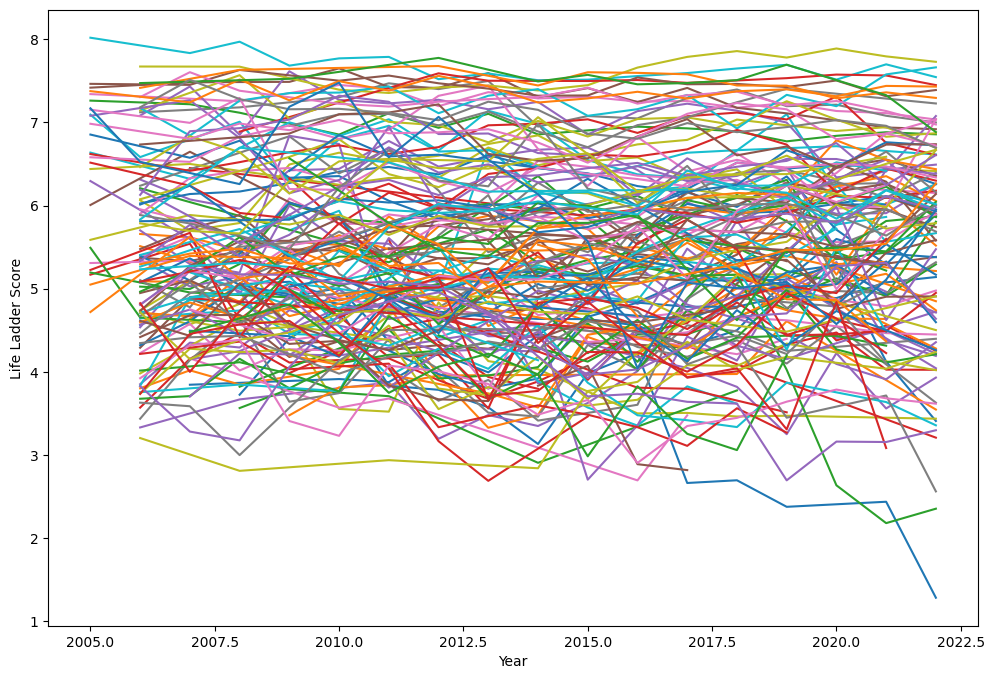

In [3]:
fig = plt.figure(figsize=(12, 8))
plt.ylabel("Life Ladder Score")

for country_name in whr_ay_transposed_df.columns.to_list():
    sns.lineplot(data=whr_ay_transposed_df, x="Year", y=f"{country_name}")

## Regional Line Charts

In [4]:
wdf = pd.read_csv("./data/processed/WHR_LL_Region_20052022.csv", index_col=0)
wdf.head()

,Year,region,region2,alpha2,Country Code,shortname,Population,Log GDP per capita,Life Ladder
96,2005,Oceania,Australia and New Zealand,AU,AUS,Australia,20176844.0,10.662058,7.340688
97,2007,Oceania,Australia and New Zealand,AU,AUS,Australia,20827622.0,10.694434,7.285391
98,2008,Oceania,Australia and New Zealand,AU,AUS,Australia,21249199.0,10.709456,7.253757
99,2010,Oceania,Australia and New Zealand,AU,AUS,Australia,22031750.0,10.713649,7.450047
100,2011,Oceania,Australia and New Zealand,AU,AUS,Australia,22340024.0,10.723386,7.405616


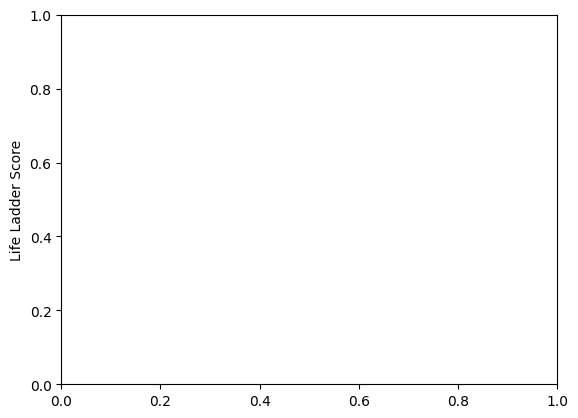

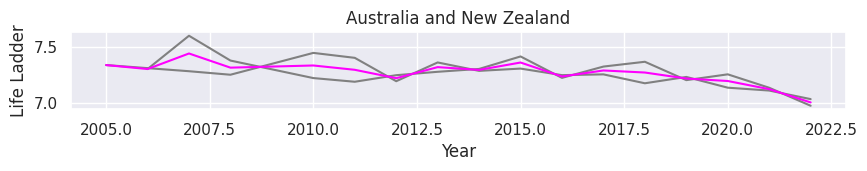

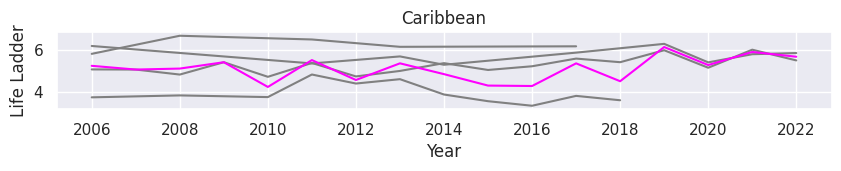

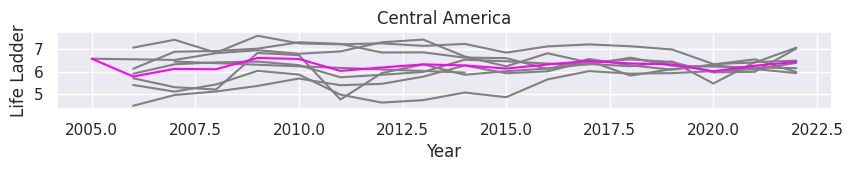

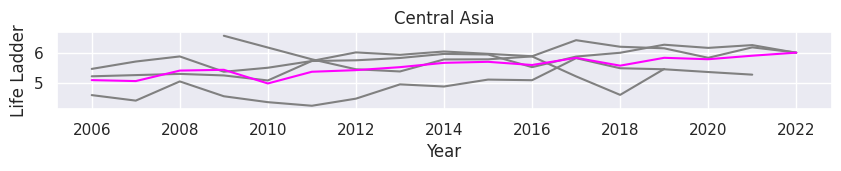

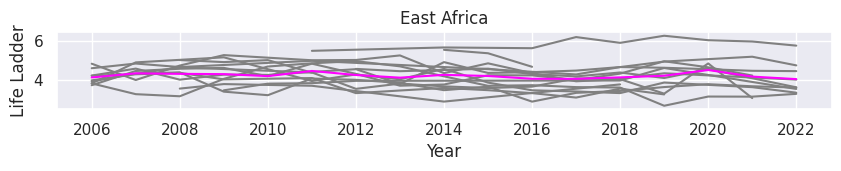

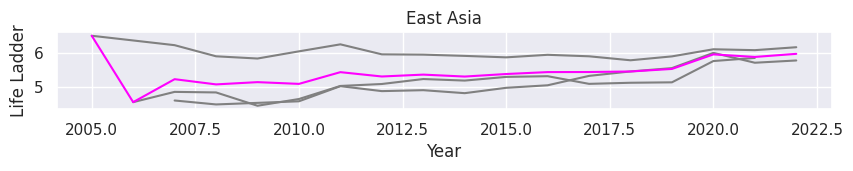

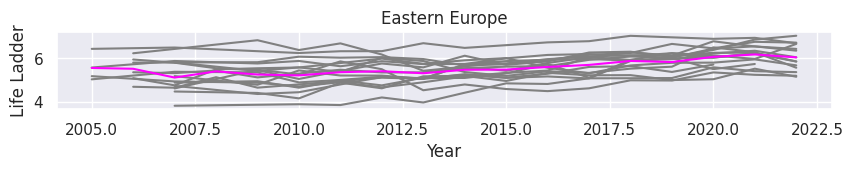

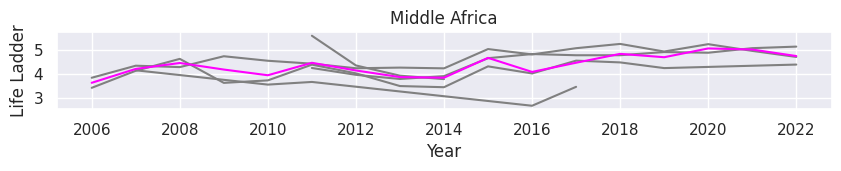

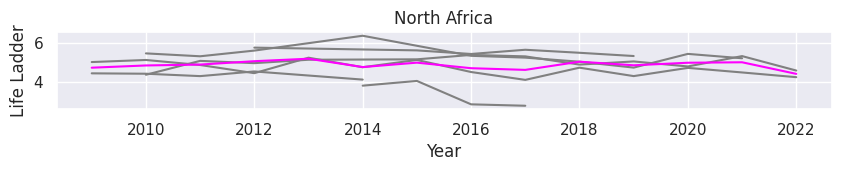

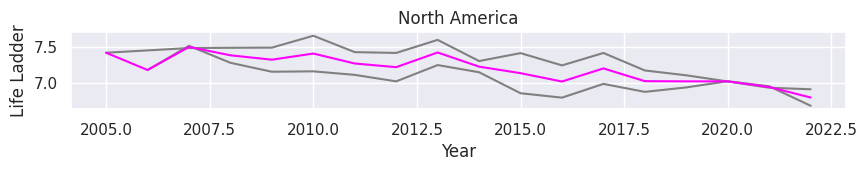

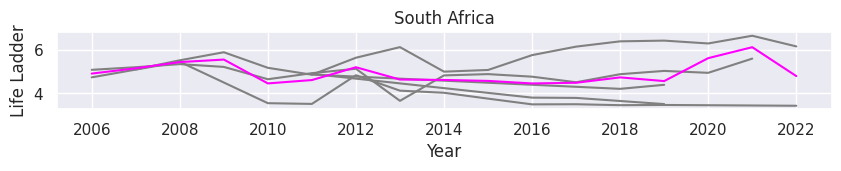

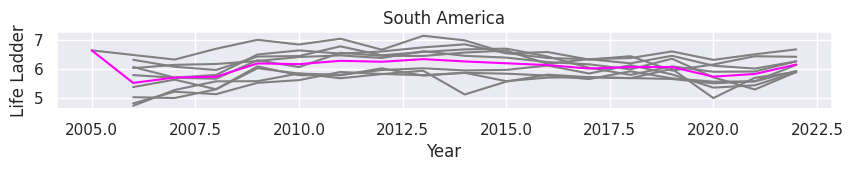

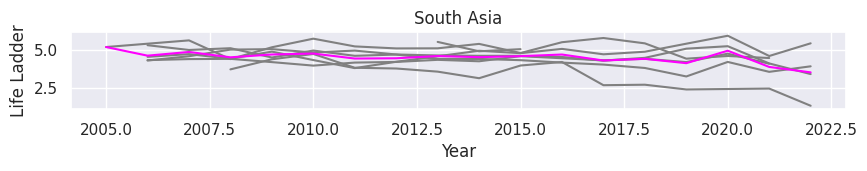

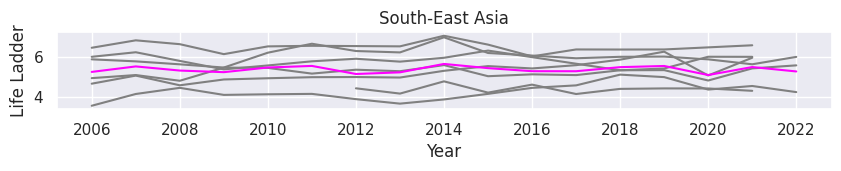

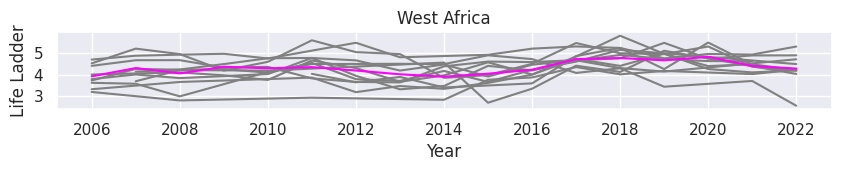

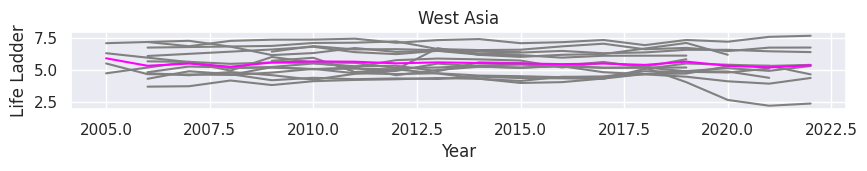

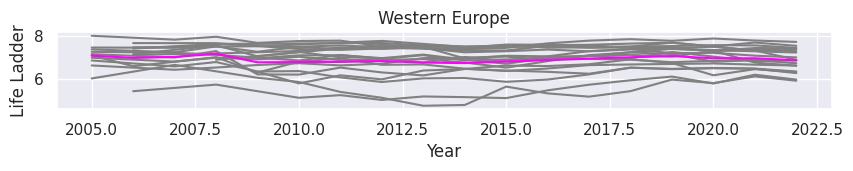

In [5]:
plt.ylabel("Life Ladder Score")
sns.set(rc={'figure.figsize':(10,1)})

for region in wdf["region2"].unique():
    fig = plt.figure()
    for country_name in wdf[wdf["region2"] == region]["shortname"].unique():
        sns.lineplot(data=wdf[wdf["shortname"] == country_name], 
                     x="Year", y="Life Ladder", color='grey').set(title=region)
    
    # regional average line
    avg_df = wdf[wdf["region2"] == region].groupby("Year")["Life Ladder"].mean().to_frame().reset_index()    
    sns.lineplot(data=avg_df, x="Year", y="Life Ladder", color='magenta')
    
sns.reset_orig()

## Static Treemaps, v1

In [6]:
ll_pop_fname = "./data/processed/WHR_LL_Pop_20052022.csv"
ll_pop_df_1 = pd.read_csv(ll_pop_fname, index_col=0)
ll_pop_df_2 = ll_pop_df_1[["Country Name", "Year", "Population", "Life Ladder"]]
ll_pop_df_2.head()

,Country Name,Year,Population,Life Ladder
0,Australia,2005,20176844.0,7.340688
1,Belgium,2005,10478617.0,7.262290
2,Brazil,2005,186797334.0,6.636771
3,Canada,2005,32243753.0,7.418048
4,Czechia,2005,10211216.0,6.439257


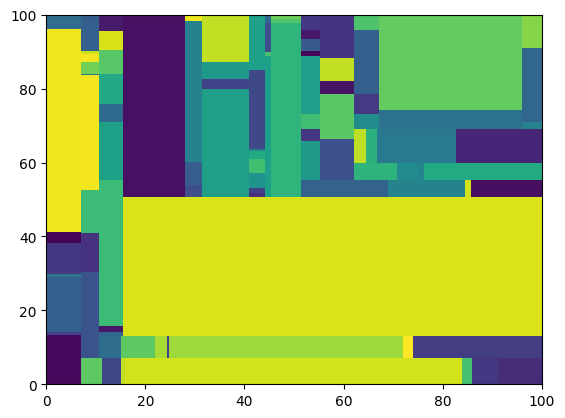

In [7]:
scores_by_country_ly = ll_pop_df_2[ll_pop_df_2["Year"] == 2022].sort_values(by="Country Name")
squarify.plot(scores_by_country_ly["Population"])
plt.show()